### Stopping Criteria
- Minimum Observations at Internal Node
- Minimum Observations at Leaf Node
- Maximum Depth - Maximum layers of tree 

### Decison Trees With Lots of nodes & splits have two major issues 
- 1) Overfitting
- 2) Interpretibility

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.tree import plot_tree

In [3]:
data = pd.read_csv('.\data\Movie_regression.csv')

In [5]:
data.shape

(506, 18)

In [7]:
data.sample(4)

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection
269,21.8130,68.92,0.536,32885.600,135.0,7.890,8.185,8.015,8.075,8.28,442828,NO,208.28,283.312,Action,29,524,41400
339,21.0994,65.38,0.485,33246.675,118.9,7.555,7.680,7.475,7.665,6.96,457316,NO,127.60,223.040,Drama,28,477,38000
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400
57,20.2864,57.64,0.589,37862.880,114.0,5.685,5.860,5.815,5.990,8.98,512129,YES,148.64,305.056,Drama,45,426,63200


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           494 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Marketing expense,506.0,92.270471,172.030902,20.1264,21.64090,25.1302,93.54165,1799.524
Production expense,506.0,77.273557,13.720706,55.9200,65.38000,74.3800,91.20000,110.480
Multiplex coverage,506.0,0.445305,0.115878,0.1290,0.37600,0.4620,0.55100,0.615
Budget,506.0,34911.144022,3903.038232,19781.3550,32693.95250,34488.2175,36793.54250,48772.900
Movie_length,506.0,142.074901,28.148861,76.4000,118.52500,151.0000,167.57500,173.500
Lead_ Actor_Rating,506.0,8.014002,1.054266,3.8400,7.31625,8.3075,8.86500,9.435
Lead_Actress_rating,506.0,8.185613,1.054290,4.0350,7.50375,8.4950,9.03000,9.540
Director_rating,506.0,8.019664,1.059899,3.8400,7.29625,8.3125,8.88375,9.425
Producer_rating,506.0,8.190514,1.049601,4.0300,7.50750,8.4650,9.03000,9.635
Critic_rating,506.0,7.810870,0.659699,6.6000,7.20000,7.9600,8.26000,9.400


In [11]:
data.isnull().sum()

Marketing expense       0
Production expense      0
Multiplex coverage      0
Budget                  0
Movie_length            0
Lead_ Actor_Rating      0
Lead_Actress_rating     0
Director_rating         0
Producer_rating         0
Critic_rating           0
Trailer_views           0
3D_available            0
Time_taken             12
Twitter_hastags         0
Genre                   0
Avg_age_actors          0
Num_multiplex           0
Collection              0
dtype: int64

In [14]:
data['Time_taken'].fillna(data['Time_taken'].mean(), inplace=True)

In [16]:
data.isnull().sum().sum()

0

### Creating Dummy Variables

In [62]:
data = pd.get_dummies(data, columns=['Genre','3D_available'], drop_first=True)

In [63]:
data.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,Genre_Comedy,Genre_Drama,Genre_Thriller,3D_available_YES
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,23,494,48000,0,0,1,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,42,462,43200,0,1,0,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,38,458,69400,1,0,0,0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,45,472,66800,0,1,0,1
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,55,395,72400,0,1,0,0


In [64]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(labels=['Collection'],axis = 1), data['Collection'],
                                                   test_size=0.3, random_state=0)

In [65]:
X_train.shape,X_test.shape

((354, 19), (152, 19))

### Building Decision Tree Model

In [68]:
# For model to be interpreteble done give depth more than 5
dtreg = DecisionTreeRegressor(max_depth=3)

In [69]:
dtreg.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3)

In [73]:
y_train_pred = dtreg.predict(X_train)

In [74]:
y_test_pred = dtreg.predict(X_test)

In [75]:
mean_squared_error(y_train, y_train_pred)

52123267.05053366

In [76]:
mean_squared_error(y_test, y_test_pred)

82891283.66139497

In [77]:
r2_score(y_train, y_train_pred)

0.8460993987811268

In [78]:
r2_score(y_test, y_test_pred)

0.7492438589063276

### Plotting Decision Tree

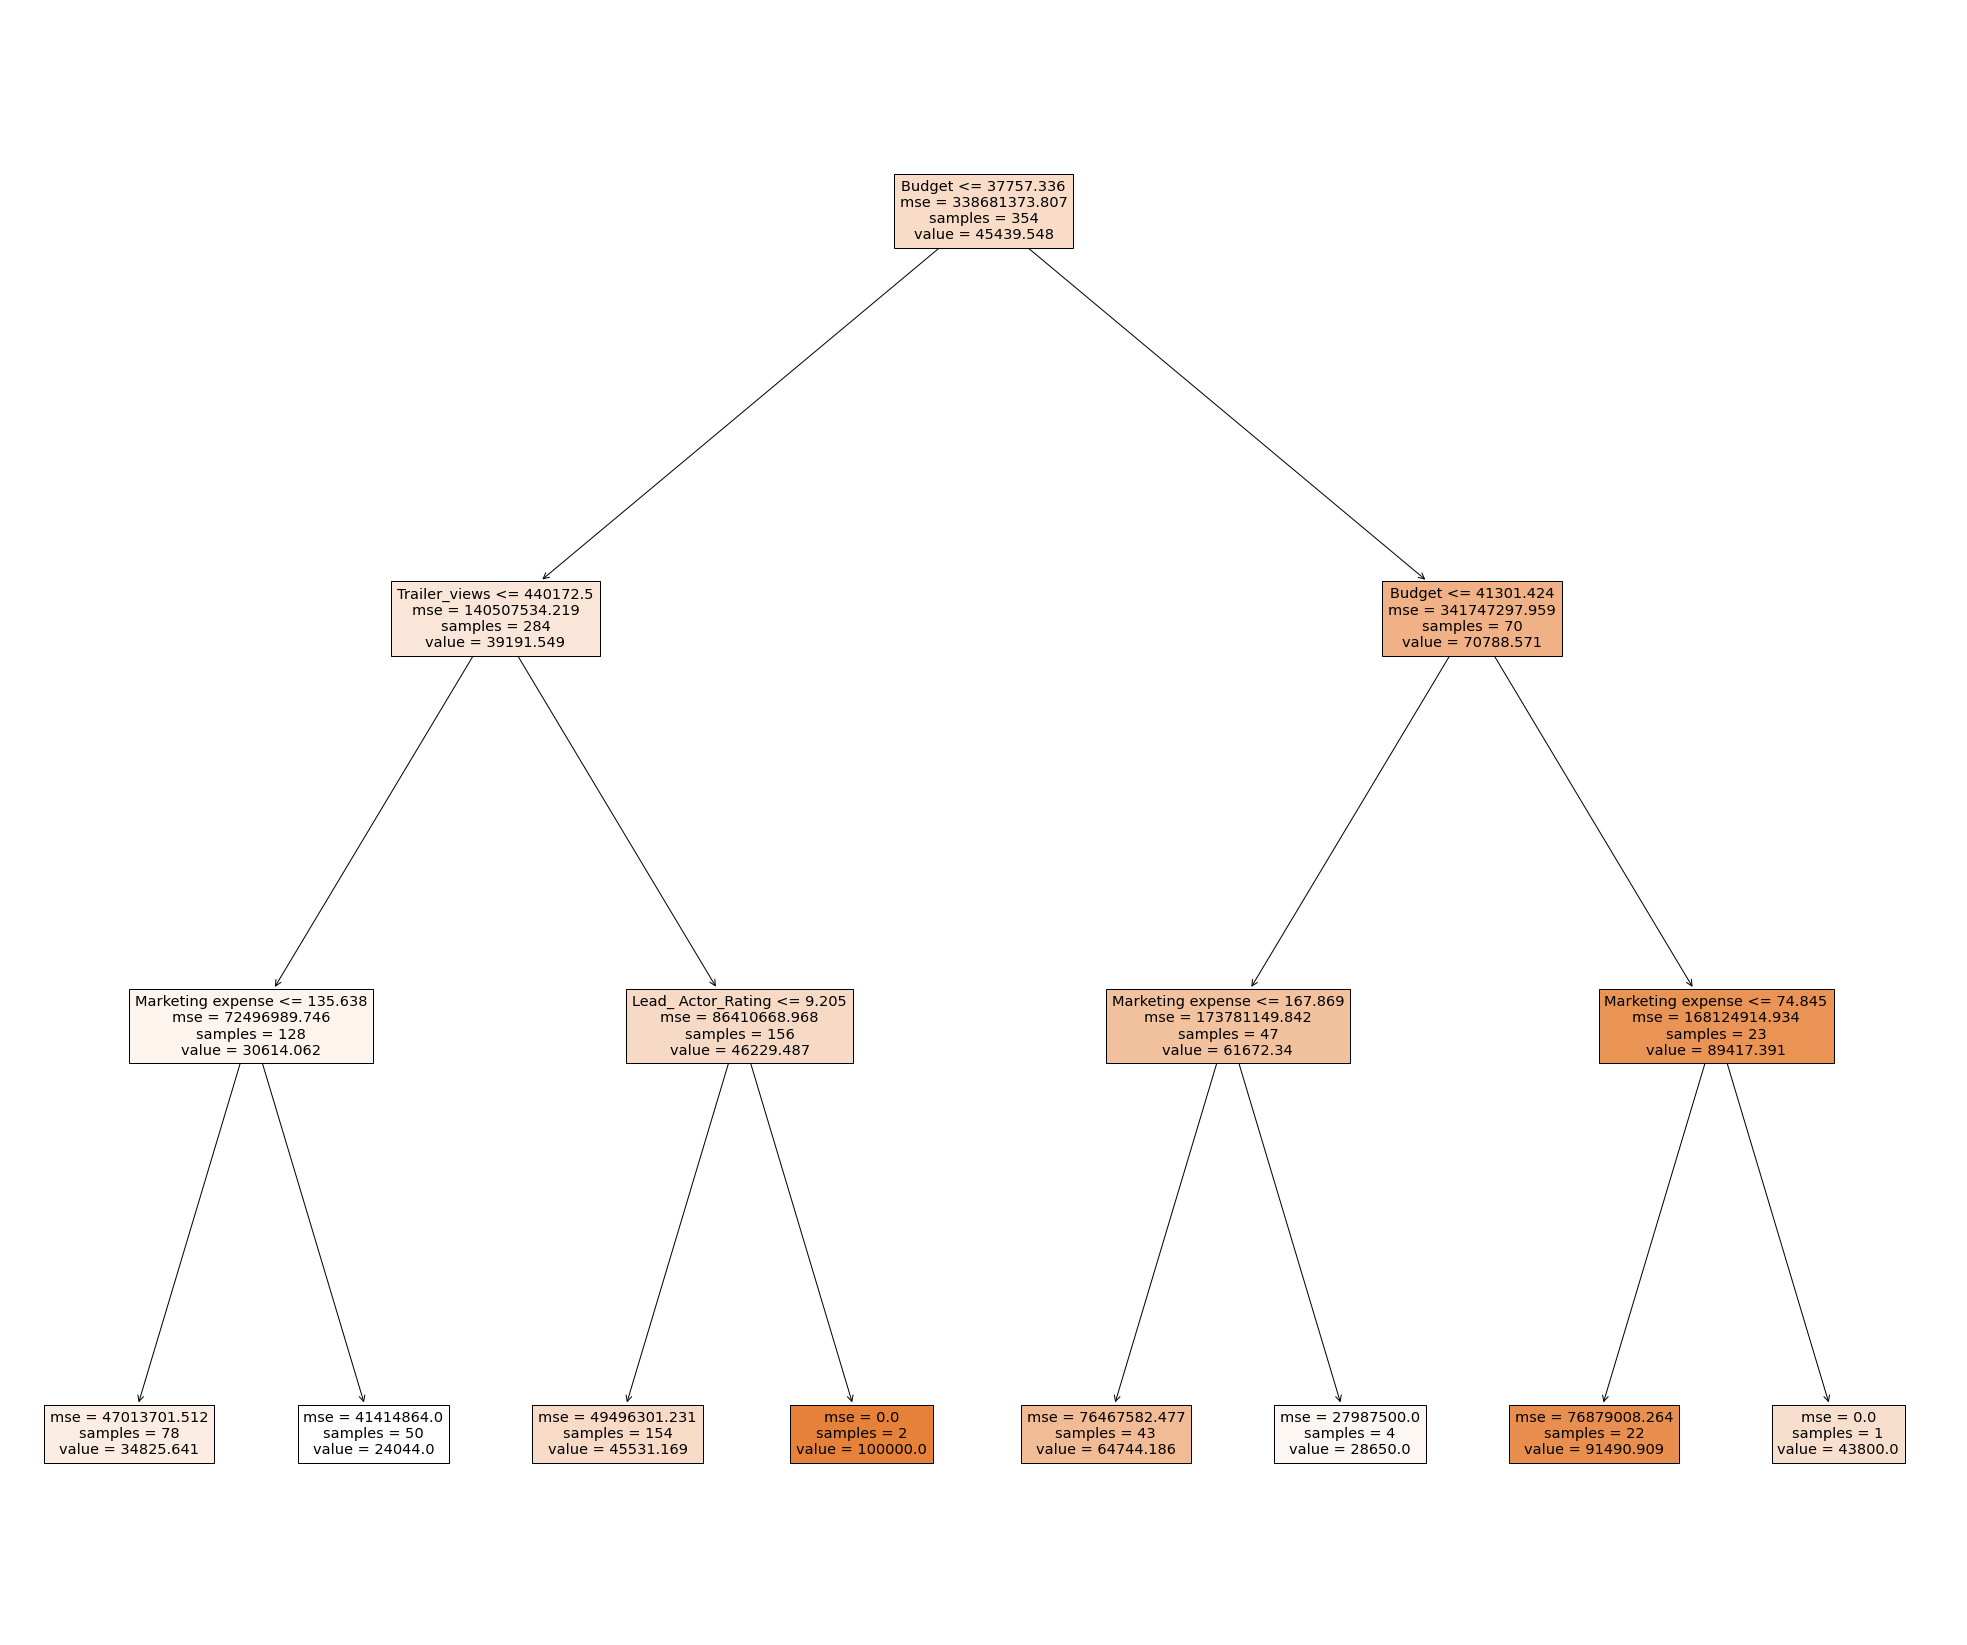

In [101]:
fig = plt.figure(figsize=(35,30))
_ = plot_tree(dtreg, filled=True, feature_names=X_train.columns)

In [83]:
from sklearn.tree import export_text
txt_tree = export_text(dtreg)
print(txt_tree)

|--- feature_3 <= 37757.34
|   |--- feature_10 <= 440172.50
|   |   |--- feature_0 <= 135.64
|   |   |   |--- value: [34825.64]
|   |   |--- feature_0 >  135.64
|   |   |   |--- value: [24044.00]
|   |--- feature_10 >  440172.50
|   |   |--- feature_5 <= 9.21
|   |   |   |--- value: [45531.17]
|   |   |--- feature_5 >  9.21
|   |   |   |--- value: [100000.00]
|--- feature_3 >  37757.34
|   |--- feature_3 <= 41301.42
|   |   |--- feature_0 <= 167.87
|   |   |   |--- value: [64744.19]
|   |   |--- feature_0 >  167.87
|   |   |   |--- value: [28650.00]
|   |--- feature_3 >  41301.42
|   |   |--- feature_0 <= 74.84
|   |   |   |--- value: [91490.91]
|   |   |--- feature_0 >  74.84
|   |   |   |--- value: [43800.00]



In [102]:
from sklearn import tree
dot_data = tree.export_graphviz(dtreg, out_file=None, feature_names=X_train.columns, filled=True)


In [103]:
from IPython.display import Image

In [105]:
import pydotplus

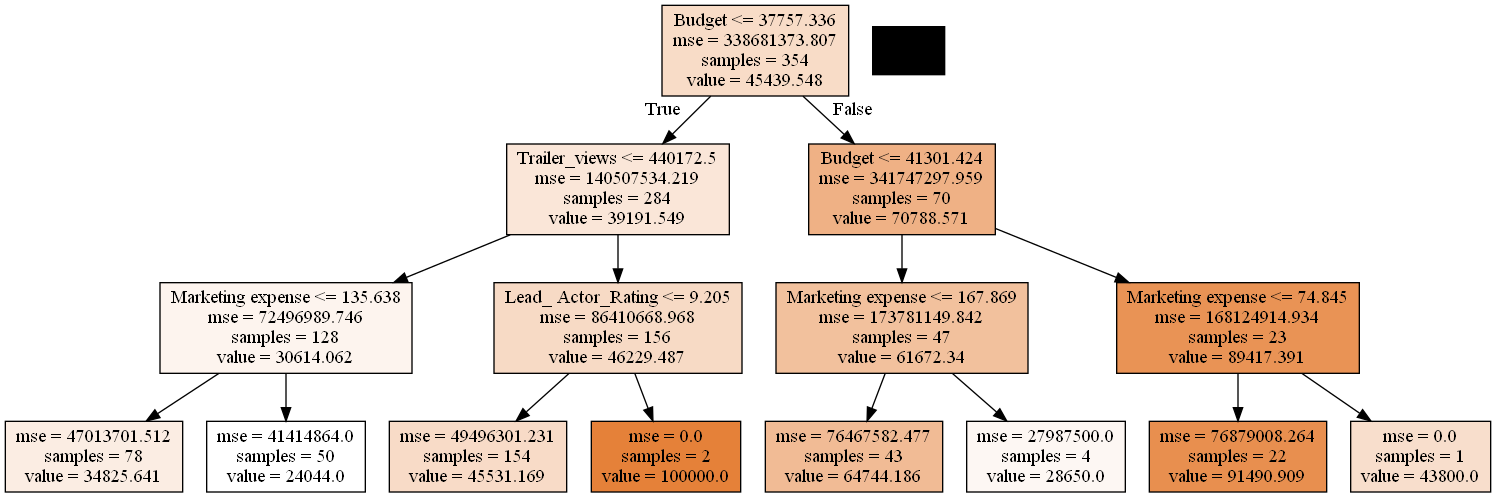

In [106]:
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## Controlling Tree Growth

### Maximum Number of Levels in Tree

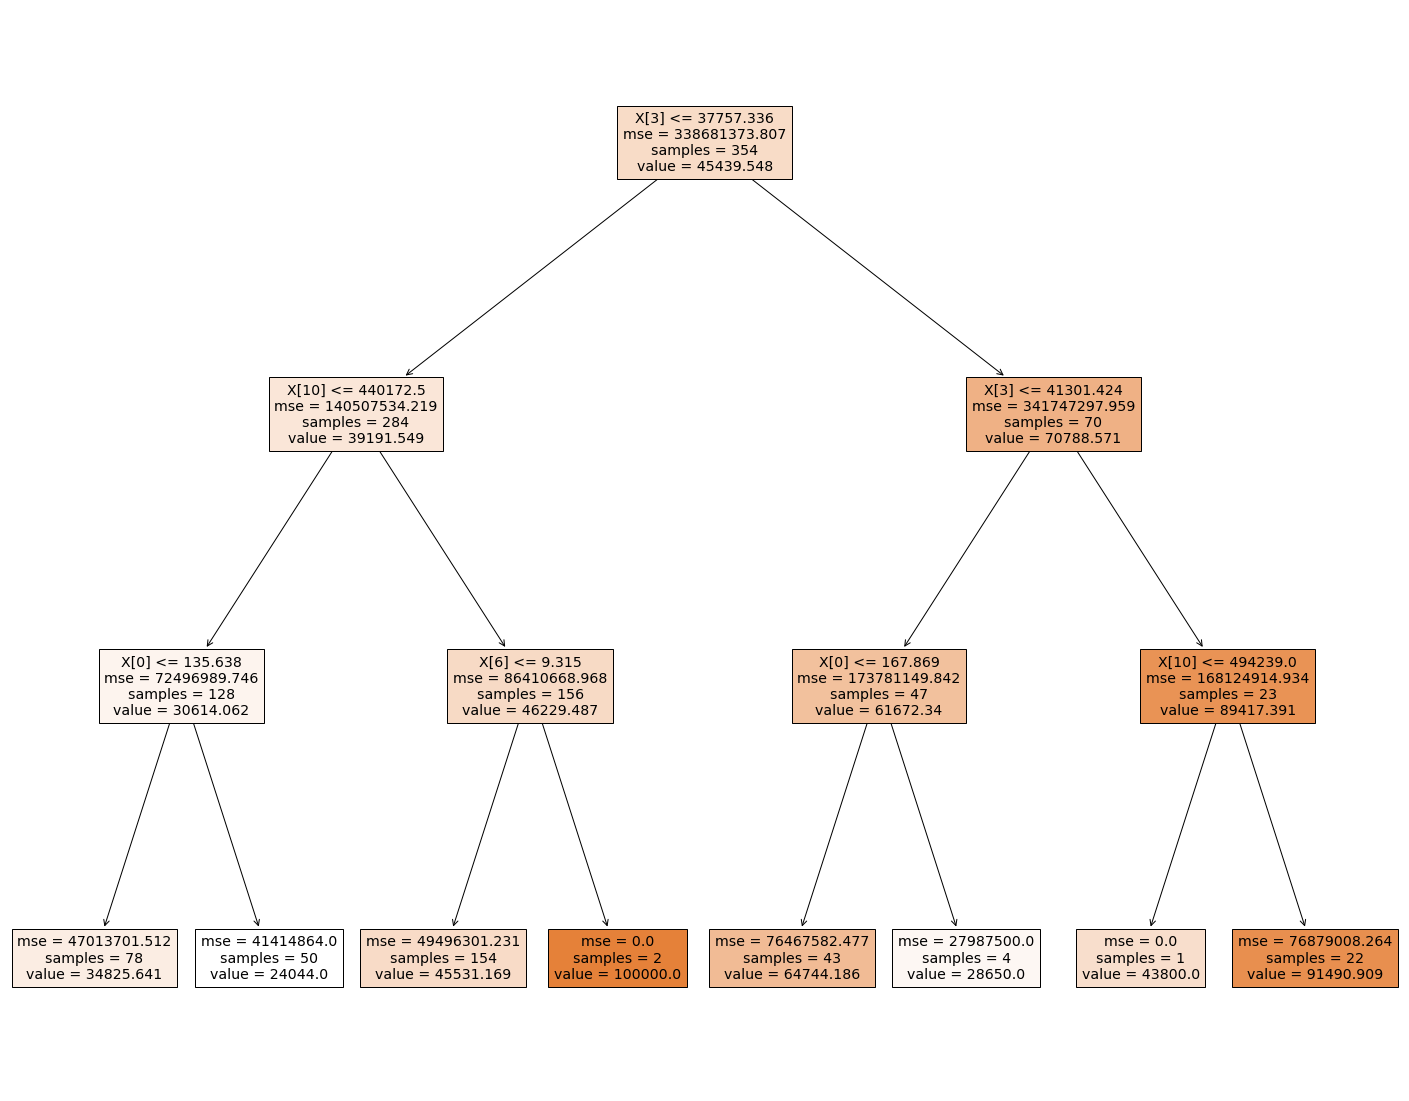

In [94]:
regtree1 = DecisionTreeRegressor(max_depth=3)
regtree1.fit(X_train, y_train)
fig = plt.figure(figsize=(25,20))
_ = plot_tree(regtree1, filled=True)


### Minimum Observations at Internal Node

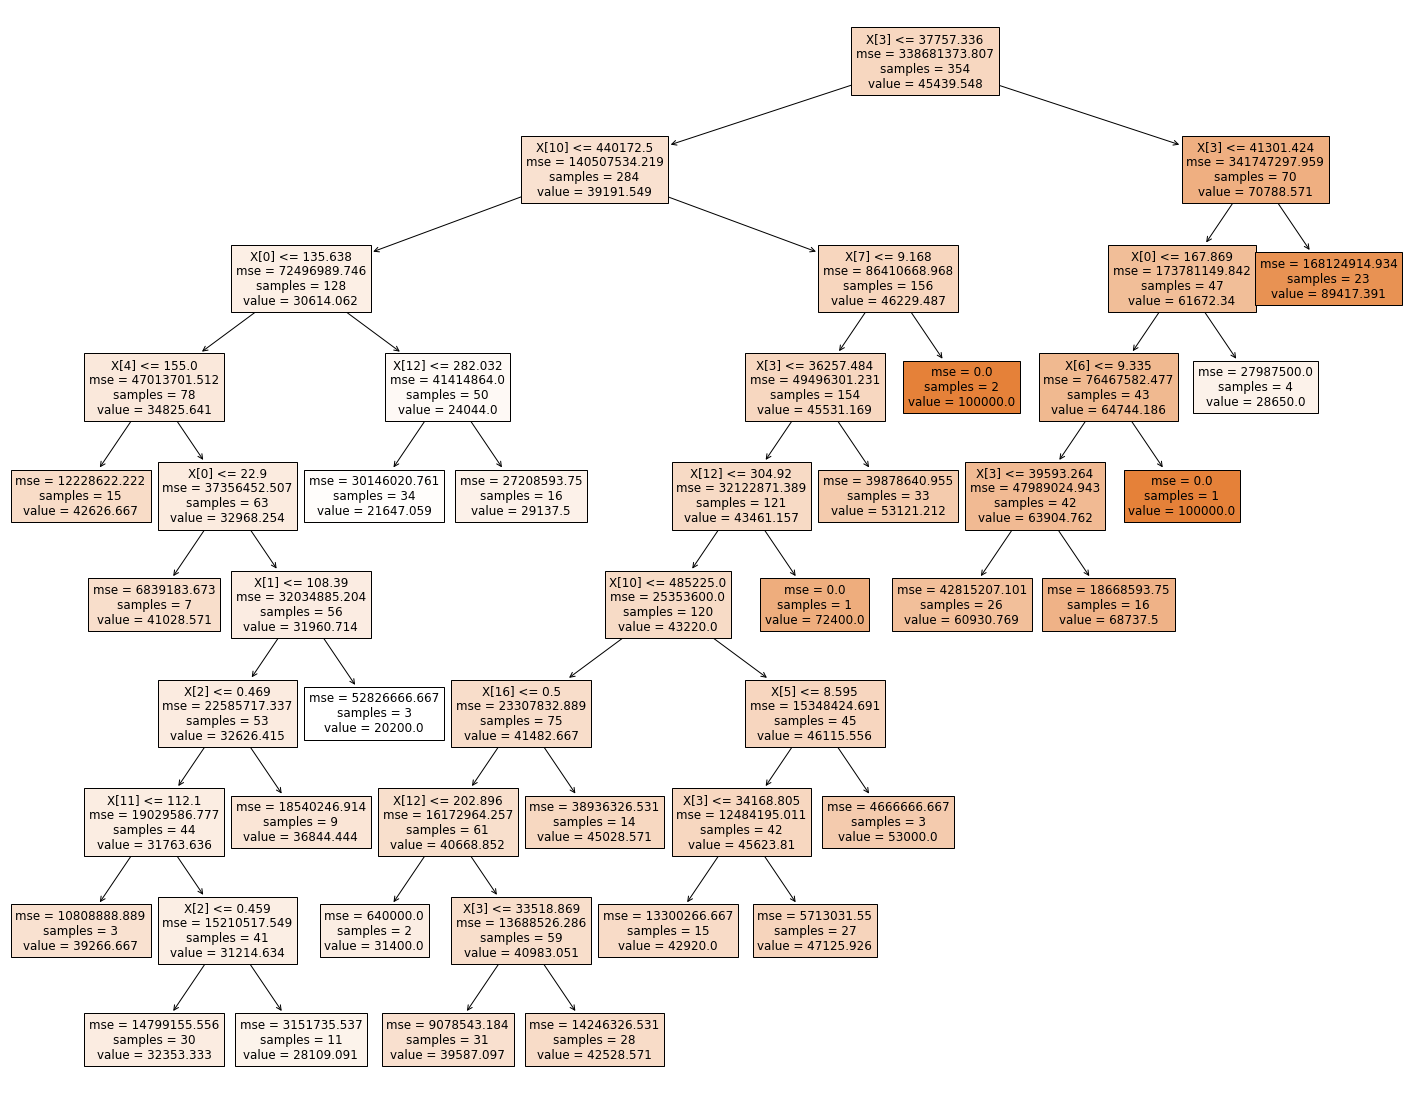

In [109]:
regtree2 = DecisionTreeRegressor(min_samples_split=40)
regtree2.fit(X_train, y_train)
fig = plt.figure(figsize=(25,20))
_ = plot_tree(regtree2, filled=True)

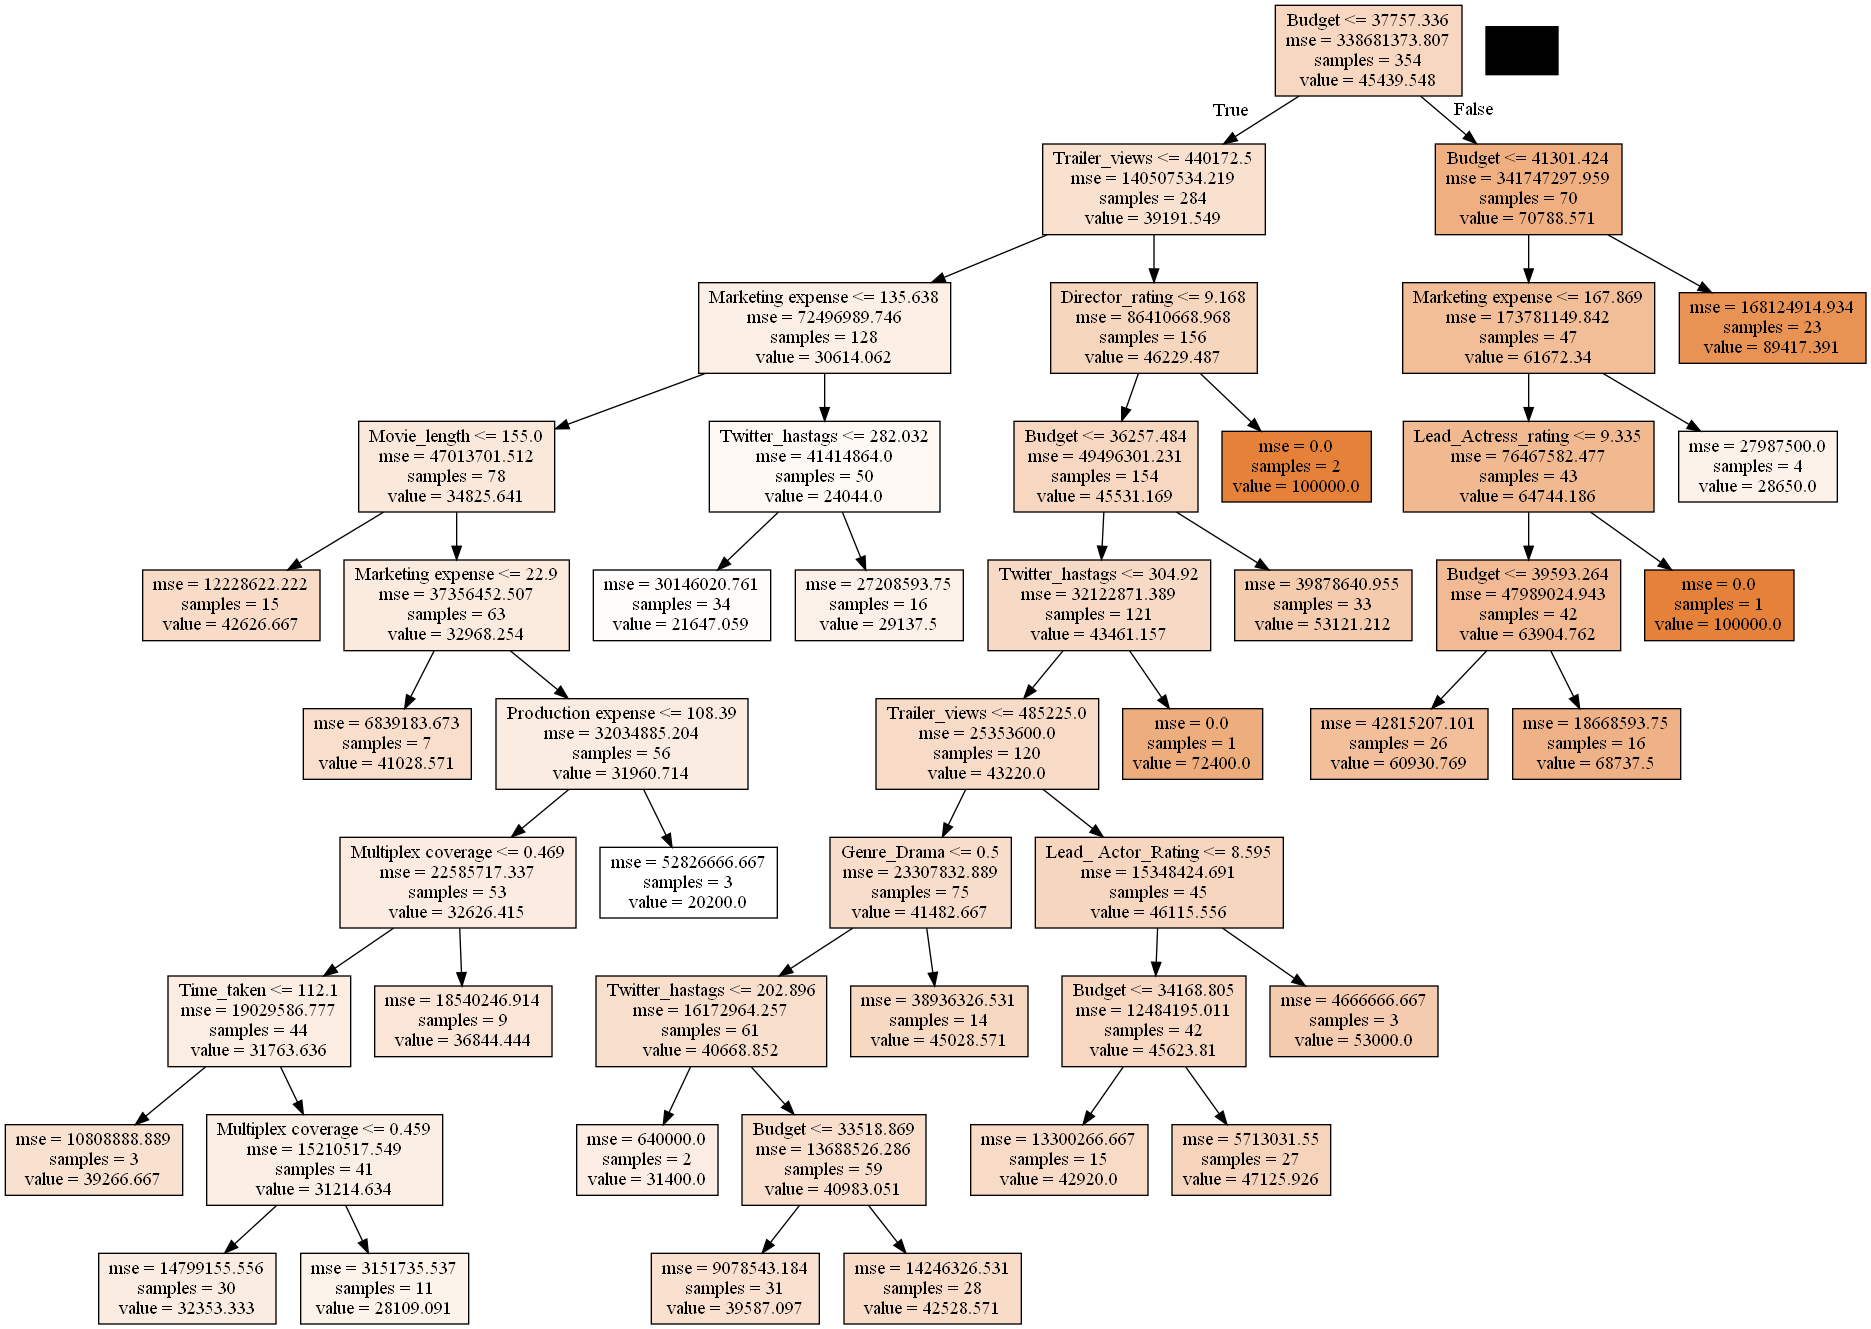

In [110]:
from sklearn import tree
import pydotplus
from IPython.display import Image

dot_data = tree.export_graphviz(regtree2, out_file=None, feature_names=X_train.columns, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

### Minimum Observations at leaf node

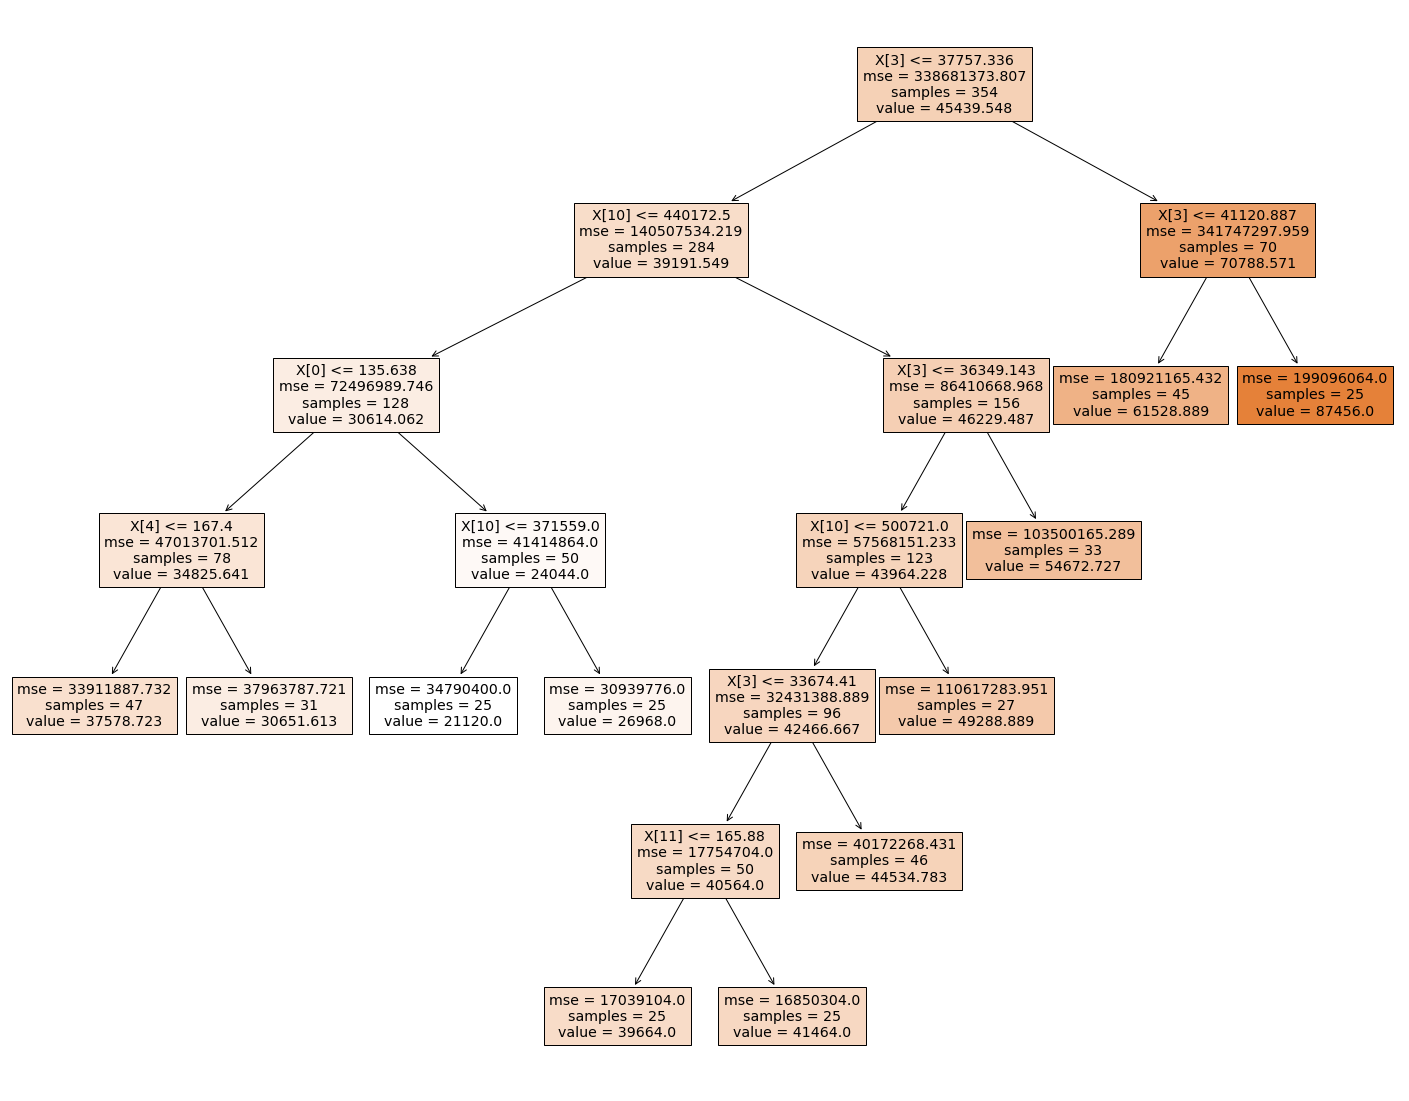

In [111]:
regtree3 = DecisionTreeRegressor(min_samples_leaf=25)
regtree3.fit(X_train, y_train)
fig = plt.figure(figsize=(25,20))
_ = plot_tree(regtree3, filled=True)

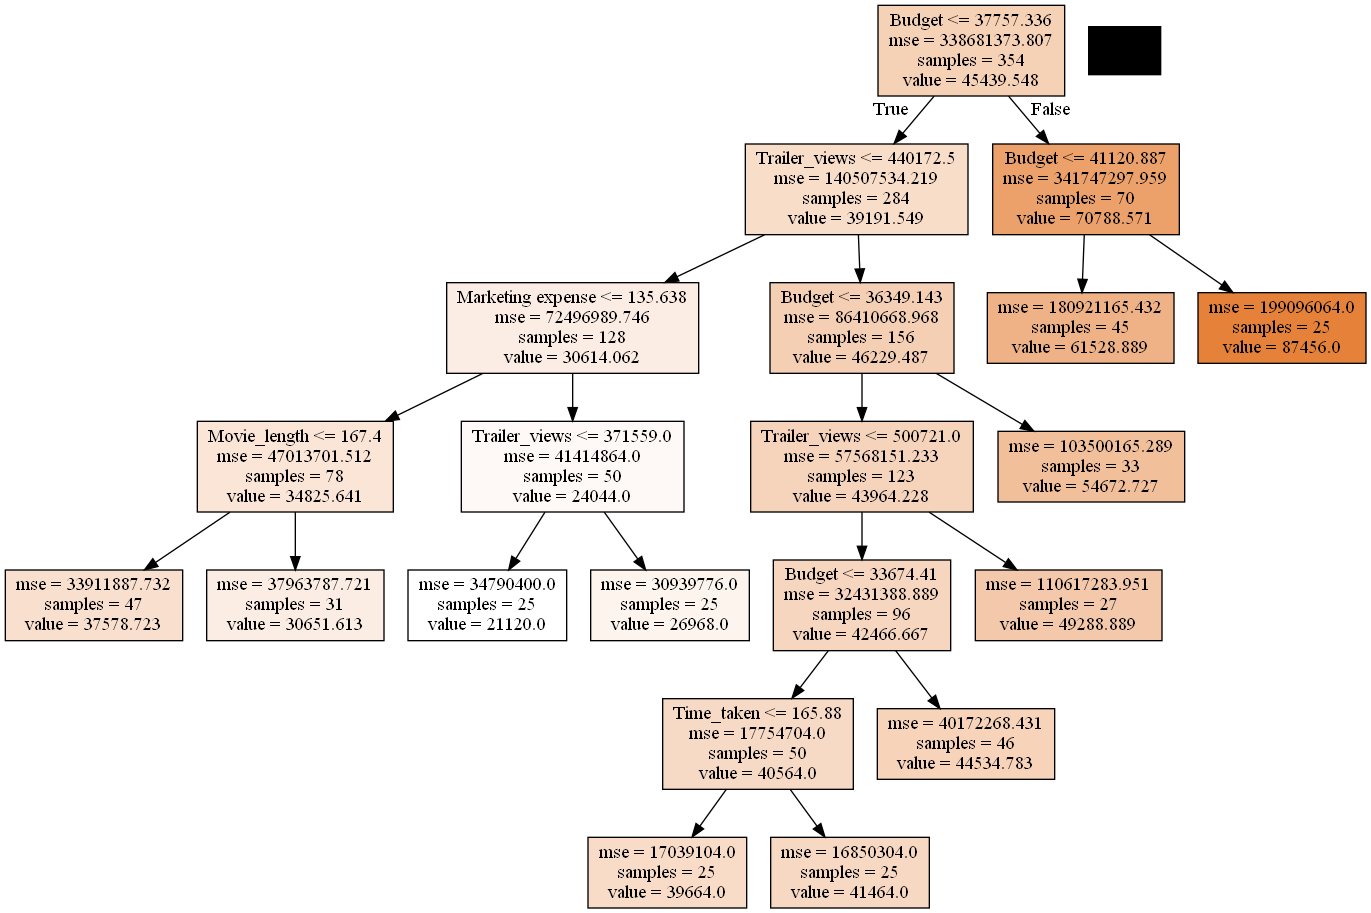

In [112]:
dot_data = tree.export_graphviz(regtree3, out_file=None, feature_names=X_train.columns, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

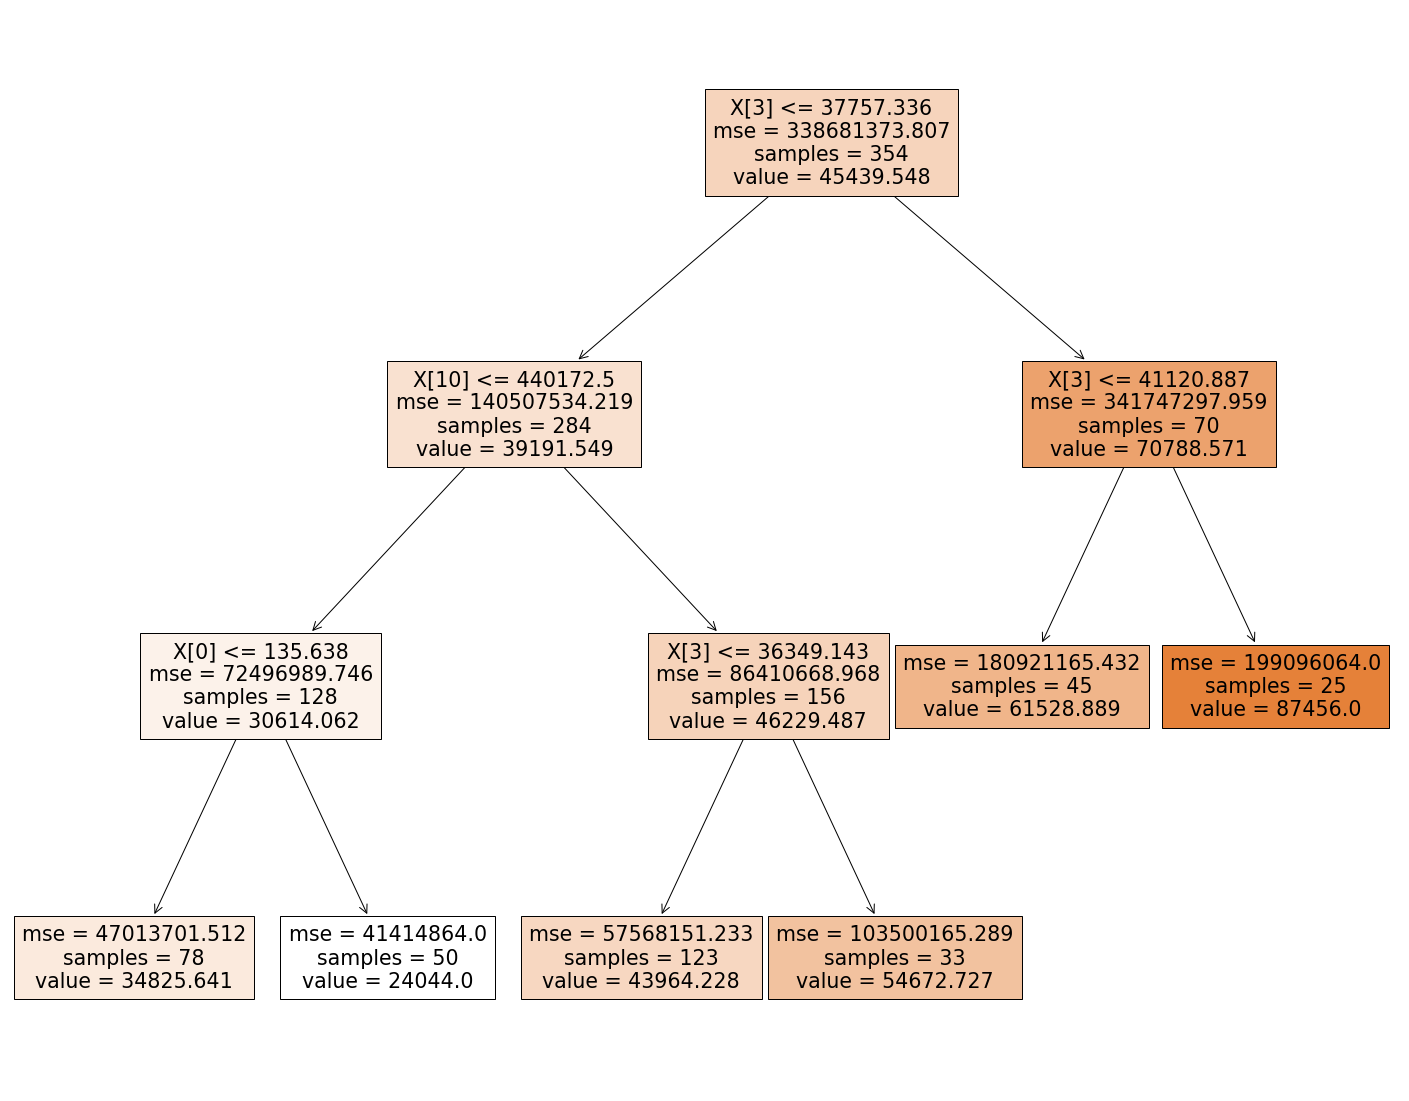

In [113]:
regtree4 = DecisionTreeRegressor(min_samples_leaf=25, max_depth=3)
regtree4.fit(X_train, y_train)
fig = plt.figure(figsize=(25,20))
_ = plot_tree(regtree4, filled=True)

In [ ]:
dot_data = tree.export_graphviz(regtree2, out_file=None, feature_names=X_train.columns, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [54]:
#encoder = OneHotEncoder( sparse=False, handle_unknown='error')
#encoder.fit(X_train[['Genre','3D_available']])

In [55]:
#encoder.transform(X_train)

In [56]:
#encoder.categories_

In [57]:
#encoder.get_feature_names()

In [59]:
#transformer = make_column_transformer(
   # (OneHotEncoder(), ['Genre', '3D_available']),
    #remainder='passthrough')

In [50]:
#transformed = transformer.fit_transform(X_train)

In [51]:
#transformed_df = pd.DataFrame(transformed, columns=transformer.get_feature_names())

In [60]:
#transformed_df

In [53]:
transformed_df.shape

(354, 21)